In [1]:
#1. Import Data & Python Packages
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
# developmental data (train)
titanic_df = pd.read_csv("D:/Python/Python101/train.csv")

# cross validation data (hold-out testing)
test_df    = pd.read_csv("D:/Python/Python101/test.csv")

# preview developmental data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# preview cross validation data
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# check missing values in train dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 2.1. Age - Missing Values
sum(pd.isnull(titanic_df['Age']))

177

In [6]:
# proportion of "Age" missing
round(177/(len(titanic_df["PassengerId"])),4)

0.1987

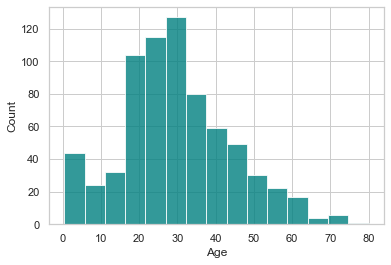

In [7]:
ax = titanic_df["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [8]:
# median age is 28 (as compared to mean which is ~30)
titanic_df["Age"].median(skipna=True)

28.0

In [9]:
# 2.2 Cabin - Missing Values
# proportion of "cabin" missing
round(687/len(titanic_df["PassengerId"]),4)

# 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise

0.771

In [10]:
# 2.3 Embarked - Missing Values
# proportion of "Embarked" missing
round(2/len(titanic_df["PassengerId"]),4)

# There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded

0.0022

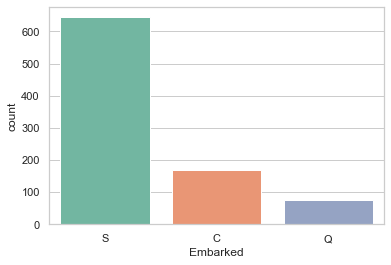

In [11]:
sns.countplot(x='Embarked',data=titanic_df,palette='Set2')
plt.show()

In [12]:
# 2.4 Final Adjustments to Data (Train & Test) 
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True) # if "Age" is missing, impute it with median age
train_data["Embarked"].fillna("S", inplace=True) # if "Embarked" is missing, impute with the most common boarding port
train_data.drop("Cabin", axis=1, inplace=True) # ignore "Cabin" as a variable. There are too many missing values for imputation

In [13]:
# 2.4.1 Additional Variables
## Create categorical variable for traveling alone

train_data["TravelBuds"]=train_data["SibSp"]+train_data["Parch"]
train_data["TravelAlone"]=np.where(train_data["TravelBuds"]>0, 0, 1)

In [14]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

In [15]:
#create categorical variable for Pclass

train2 = pd.get_dummies(train_data, columns=["Pclass"])


In [16]:
train3 = pd.get_dummies(train2, columns=["Embarked"])


In [17]:
train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)


In [18]:
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [19]:
df_final = train4

In [20]:
# apply the same changes to the test data
test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [21]:
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [22]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


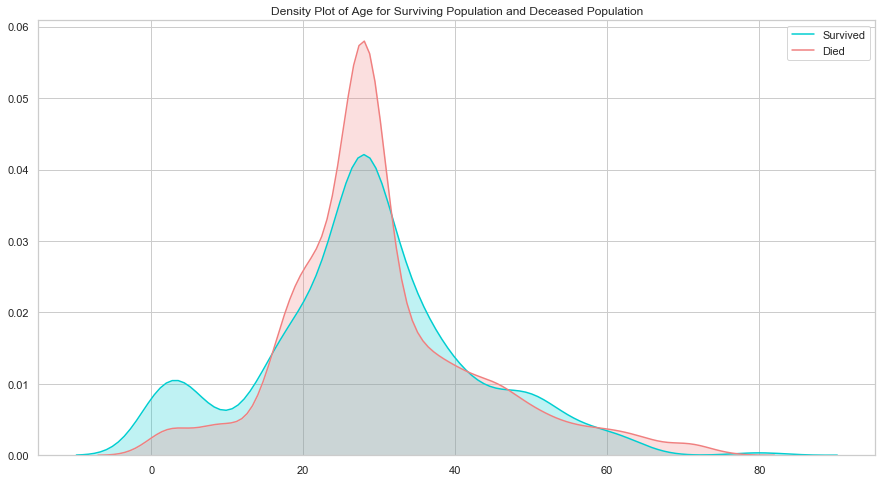

In [23]:
# 3. Exploratory Data Analysis 
# 3.1 Exploration of Age
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

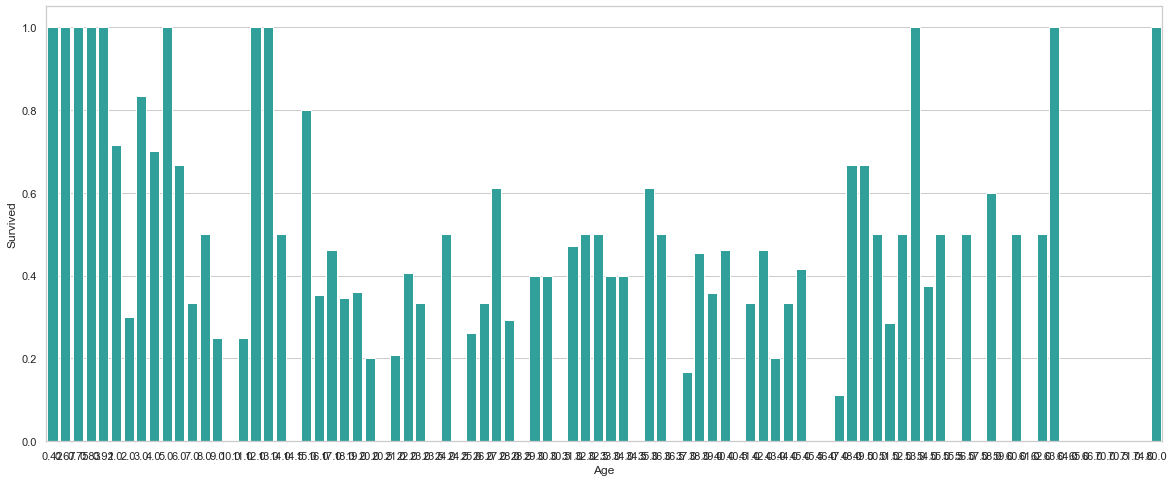

In [24]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [25]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [26]:
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

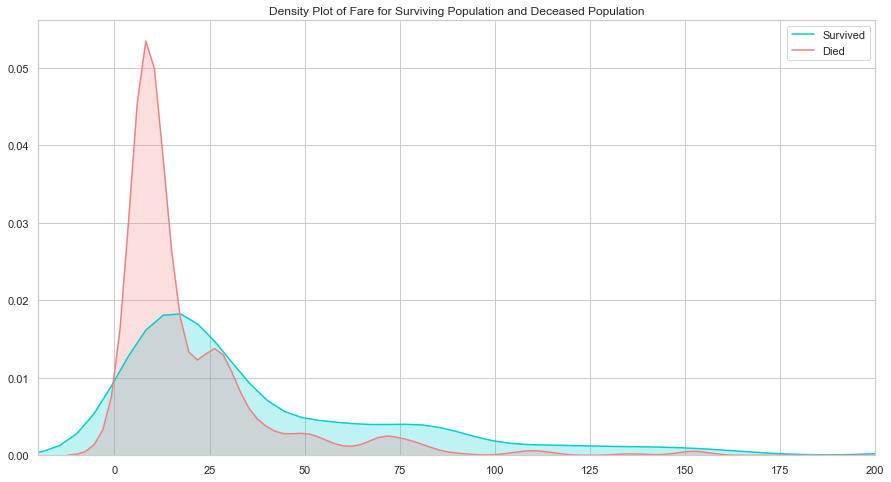

In [27]:
# 3.2 Exploration of Fare 
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

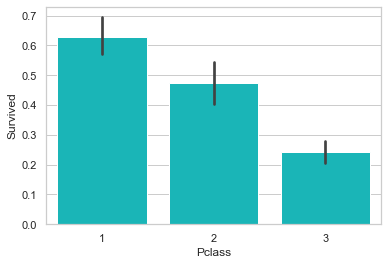

In [28]:
# 3.3 Exploration of Passenger Class 
sns.barplot('Pclass', 'Survived', data=titanic_df, color="darkturquoise")
plt.show()

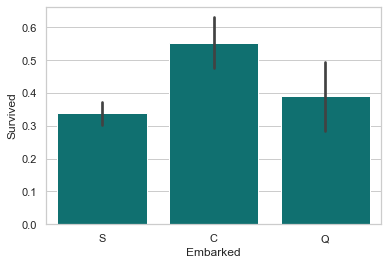

In [29]:
# 3.4 Exploration of Embarked Port
sns.barplot('Embarked', 'Survived', data=titanic_df, color="teal")
plt.show()

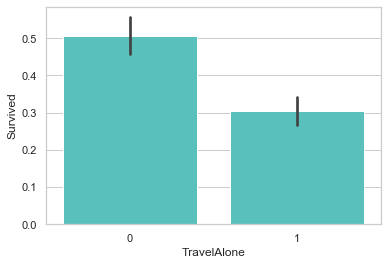

In [30]:
# 3.5 Exploration of Traveling Alone vs. With Family
sns.barplot('TravelAlone', 'Survived', data=df_final, color="mediumturquoise")
plt.show()

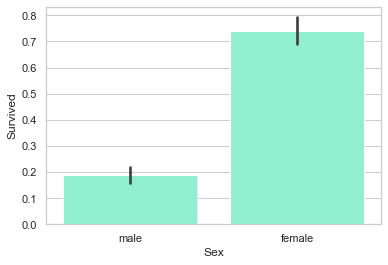

In [31]:
# 3.6 Exploration of Gender Variable
sns.barplot('Sex', 'Survived', data=titanic_df, color="aquamarine")
plt.show()